In [1]:
import os
import sys

import opensim as osim
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath('../..'))
from jam_analysis import JamAnalysis

In [2]:
import importlib
import jam_analysis
from jam_analysis import JamAnalysis
from jam_analysis import get_h5_output

In [3]:
model = 'smith2019'

matlab_dir = os.path.abspath('../../../../matlab/')
results_dir = os.path.join(matlab_dir, 'analysis/test/jam_analysis/data/')
# only get subfolders - ignore anything else that might be added
test_files = [os.path.join(results_dir, x, 'walking.h5') for x in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, x))]



In [4]:
jam = JamAnalysis()
jam.jam_analysis(test_files, model)

In [5]:
jam.comak.keys()

dict_keys(['converged', 'iterations', 'max_udot_error', 'time'])

In [6]:
fontsize=20
linewidth=5

# Plot Secondary Coordinates

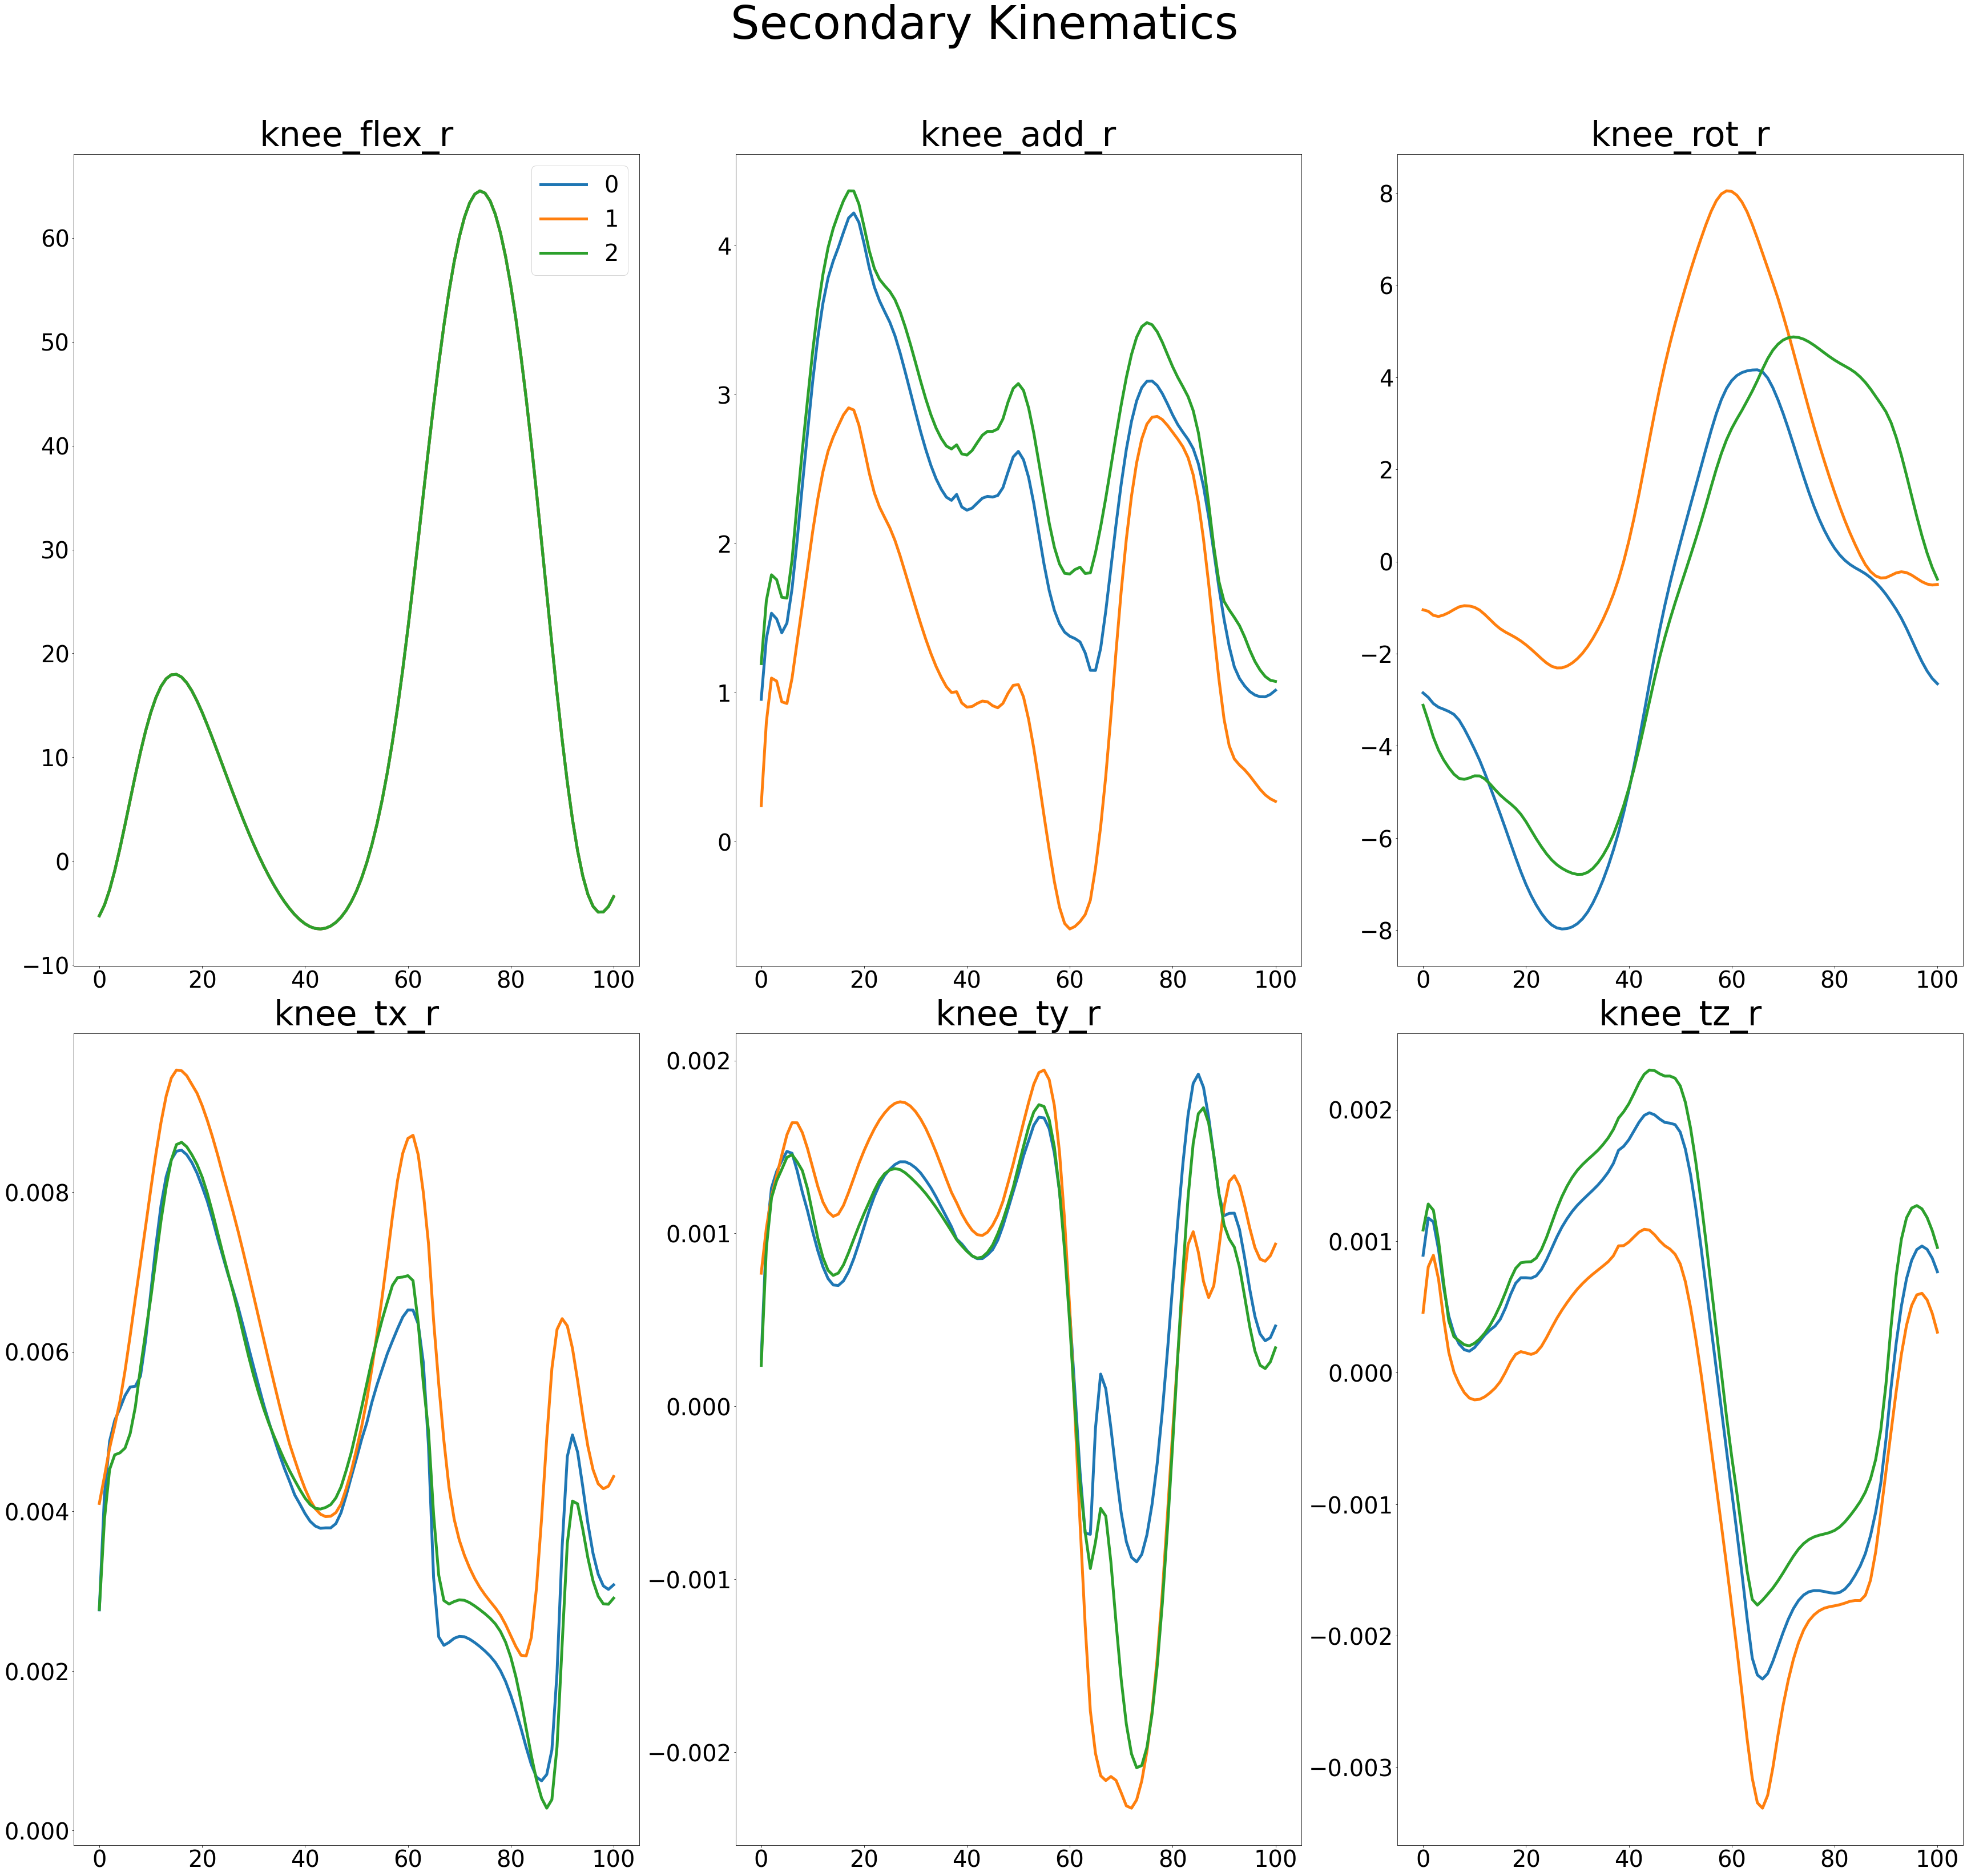

In [7]:
sec_coords = [
    'knee_flex_r','knee_add_r','knee_rot_r',
    'knee_tx_r','knee_ty_r','knee_tz_r',
]

rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(16*3, 4*12))
for idx, outcome in enumerate(sec_coords):
    row_ = idx // cols
    col_ = idx % cols
    for file_idx in range(len(test_files)):
        ax[row_, col_].plot(jam.coordinateset[outcome]['value'][:,file_idx], linewidth=linewidth, label=file_idx)
    ax[row_, col_].set_title(outcome, fontsize=fontsize*3)
    ax[row_, col_].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[row_, col_].yaxis.set_tick_params(labelsize=fontsize*2)
    if idx == 0:
        ax[row_, col_].legend(fontsize=fontsize*2)

fig.suptitle('Secondary Kinematics', fontsize=fontsize*4)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


# Plot Ligament Forces

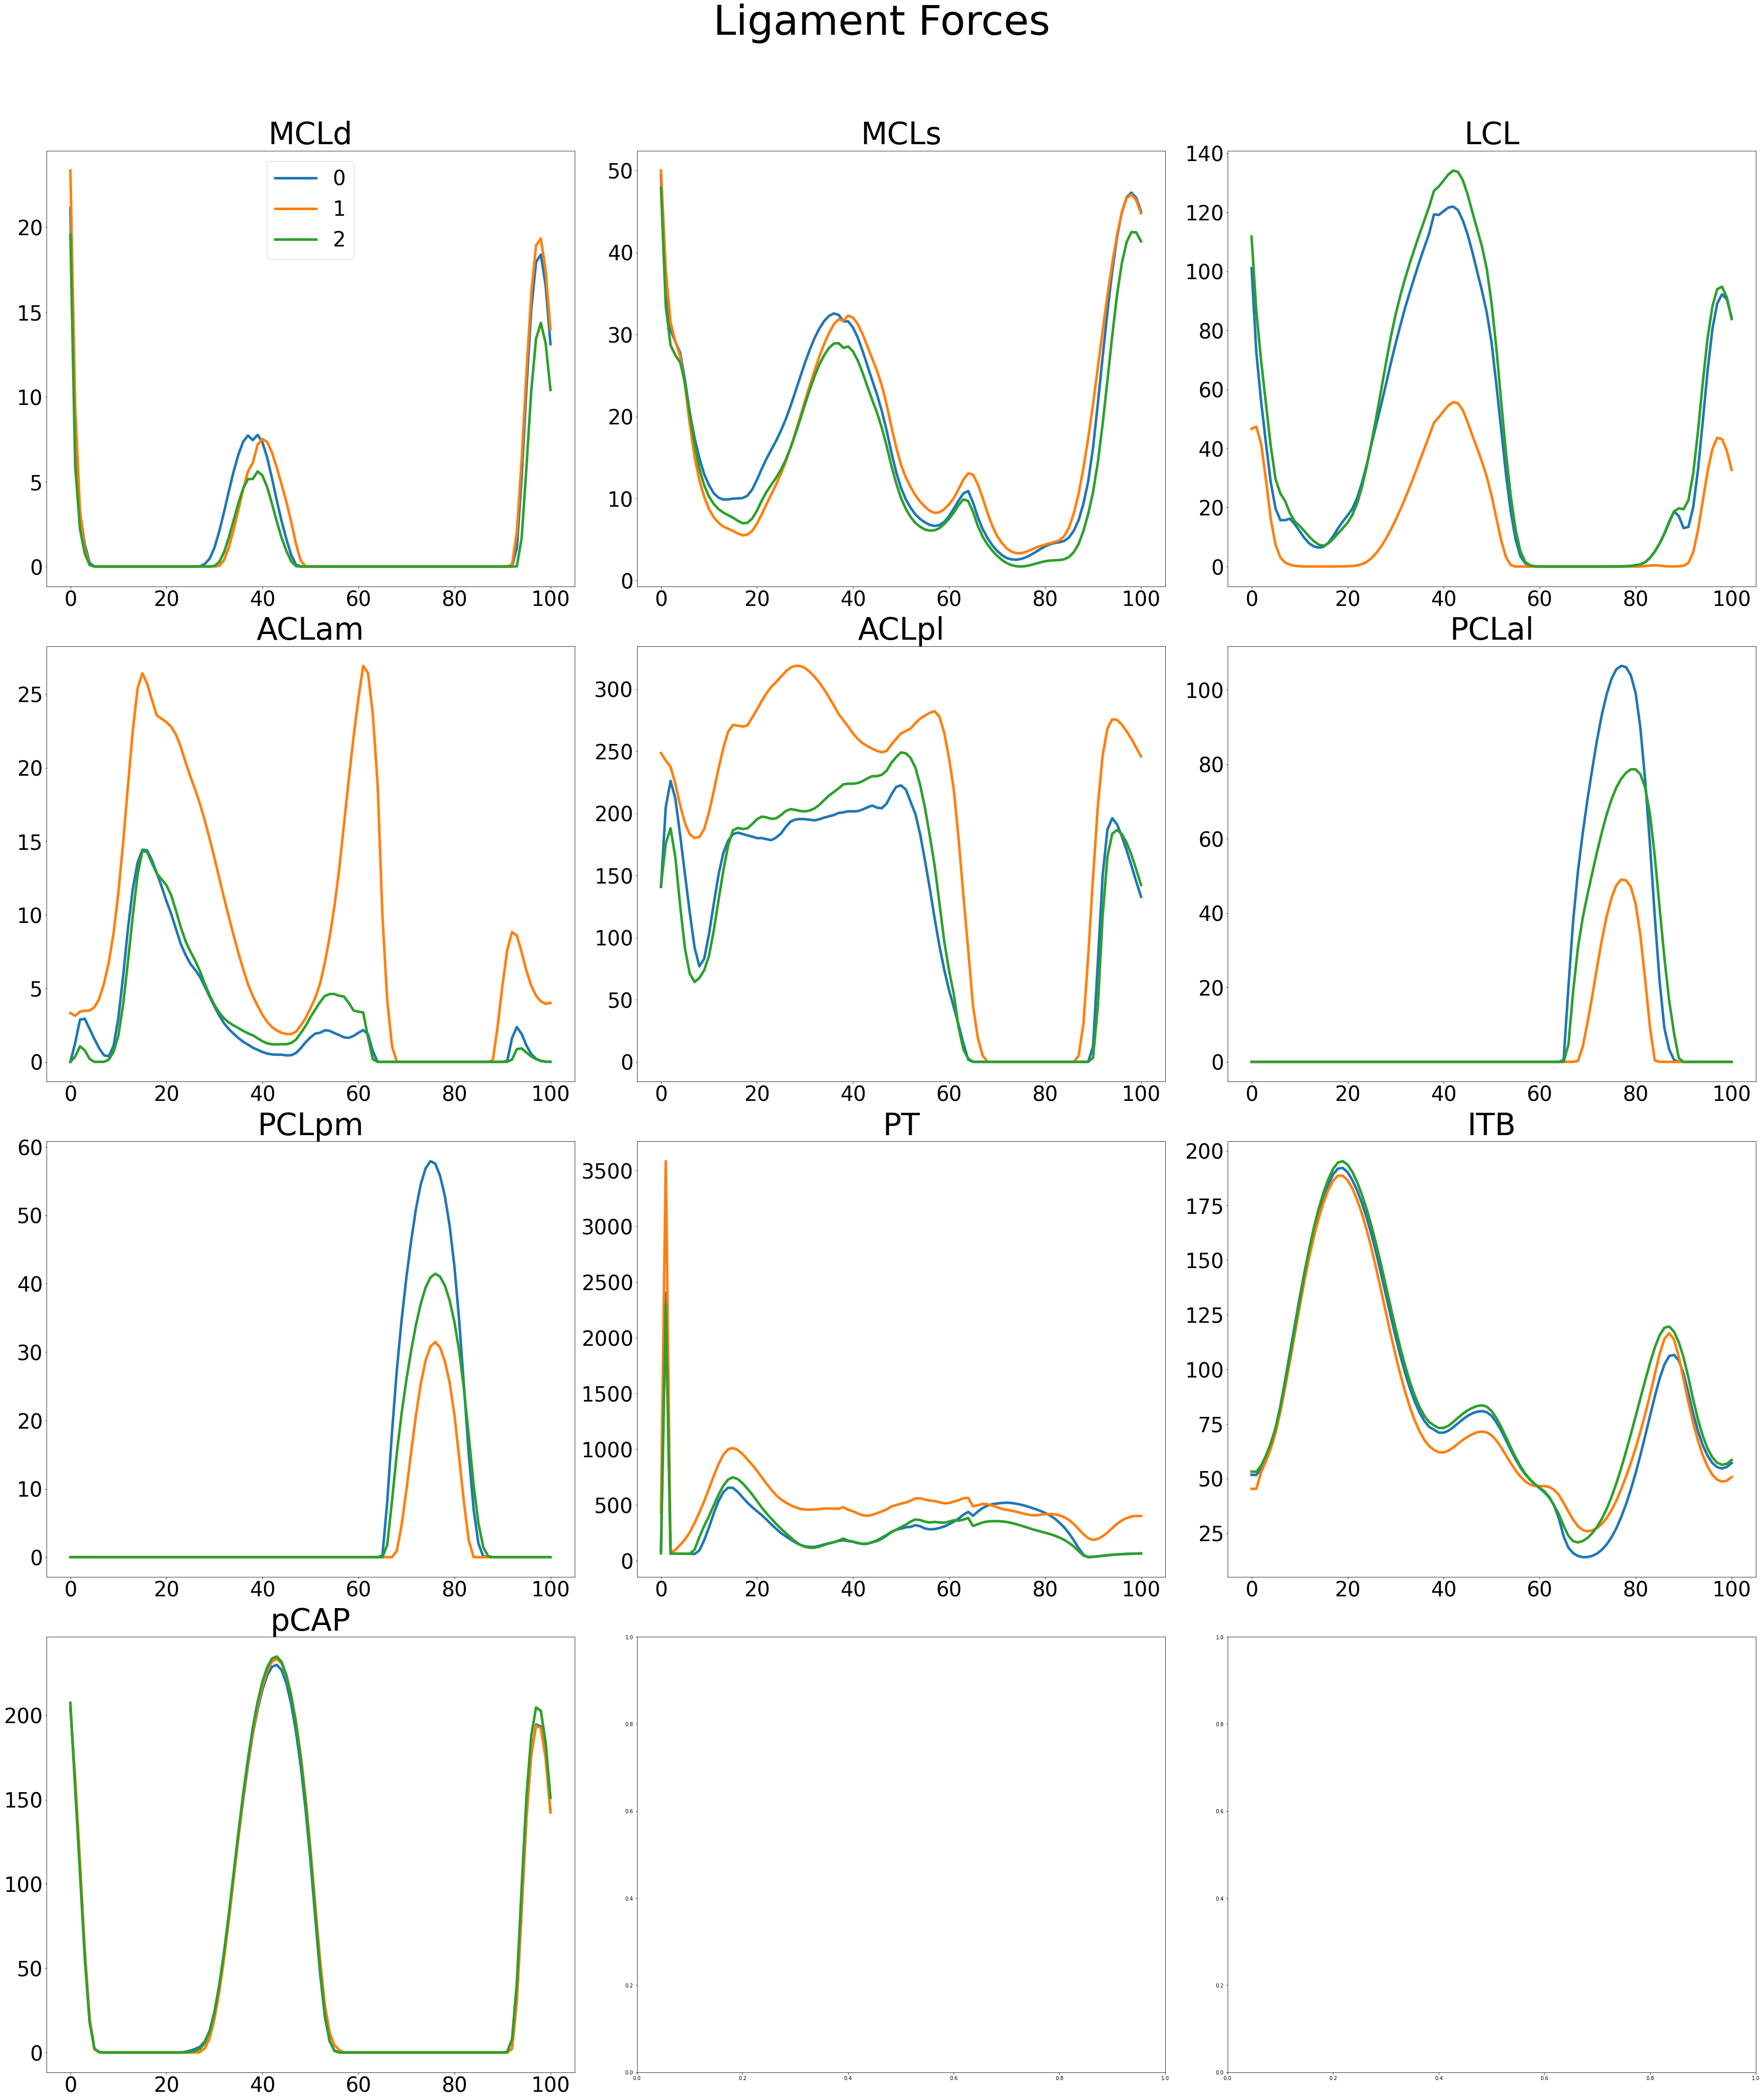

In [8]:
# Ligament Forces
ligament_names = [
    'MCLd','MCLs',
    'LCL',
    'ACLam', 'ACLpl',
    'PCLal', 'PCLpm',
    'PT',
    'ITB',
    'pCAP'
]

rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(16*cols, (rows+1)*12))
fig.suptitle('Ligament Forces', fontsize=fontsize*4)

for idx, outcome in enumerate(ligament_names):
    row_ = idx // cols
    col_ = idx % cols
    
    fibers = [x for x in jam.forceset['Blankevoort1991Ligament'].keys() if outcome in x]
    
    
    for file_idx in range(len(test_files)):
        data = np.zeros(jam.forceset['Blankevoort1991Ligament'][fibers[0]]['total_force'].shape[0])
        for fiber in fibers:
            data += np.squeeze(jam.forceset['Blankevoort1991Ligament'][fiber]['total_force'][:, file_idx])
        ax[row_, col_].plot(data, linewidth=5, label=file_idx)
    ax[row_, col_].set_title(outcome, fontsize=fontsize*3)
    ax[row_, col_].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[row_, col_].yaxis.set_tick_params(labelsize=fontsize*2)
    if idx == 0:
        ax[row_, col_].legend(fontsize=fontsize*2)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Muscle Forces

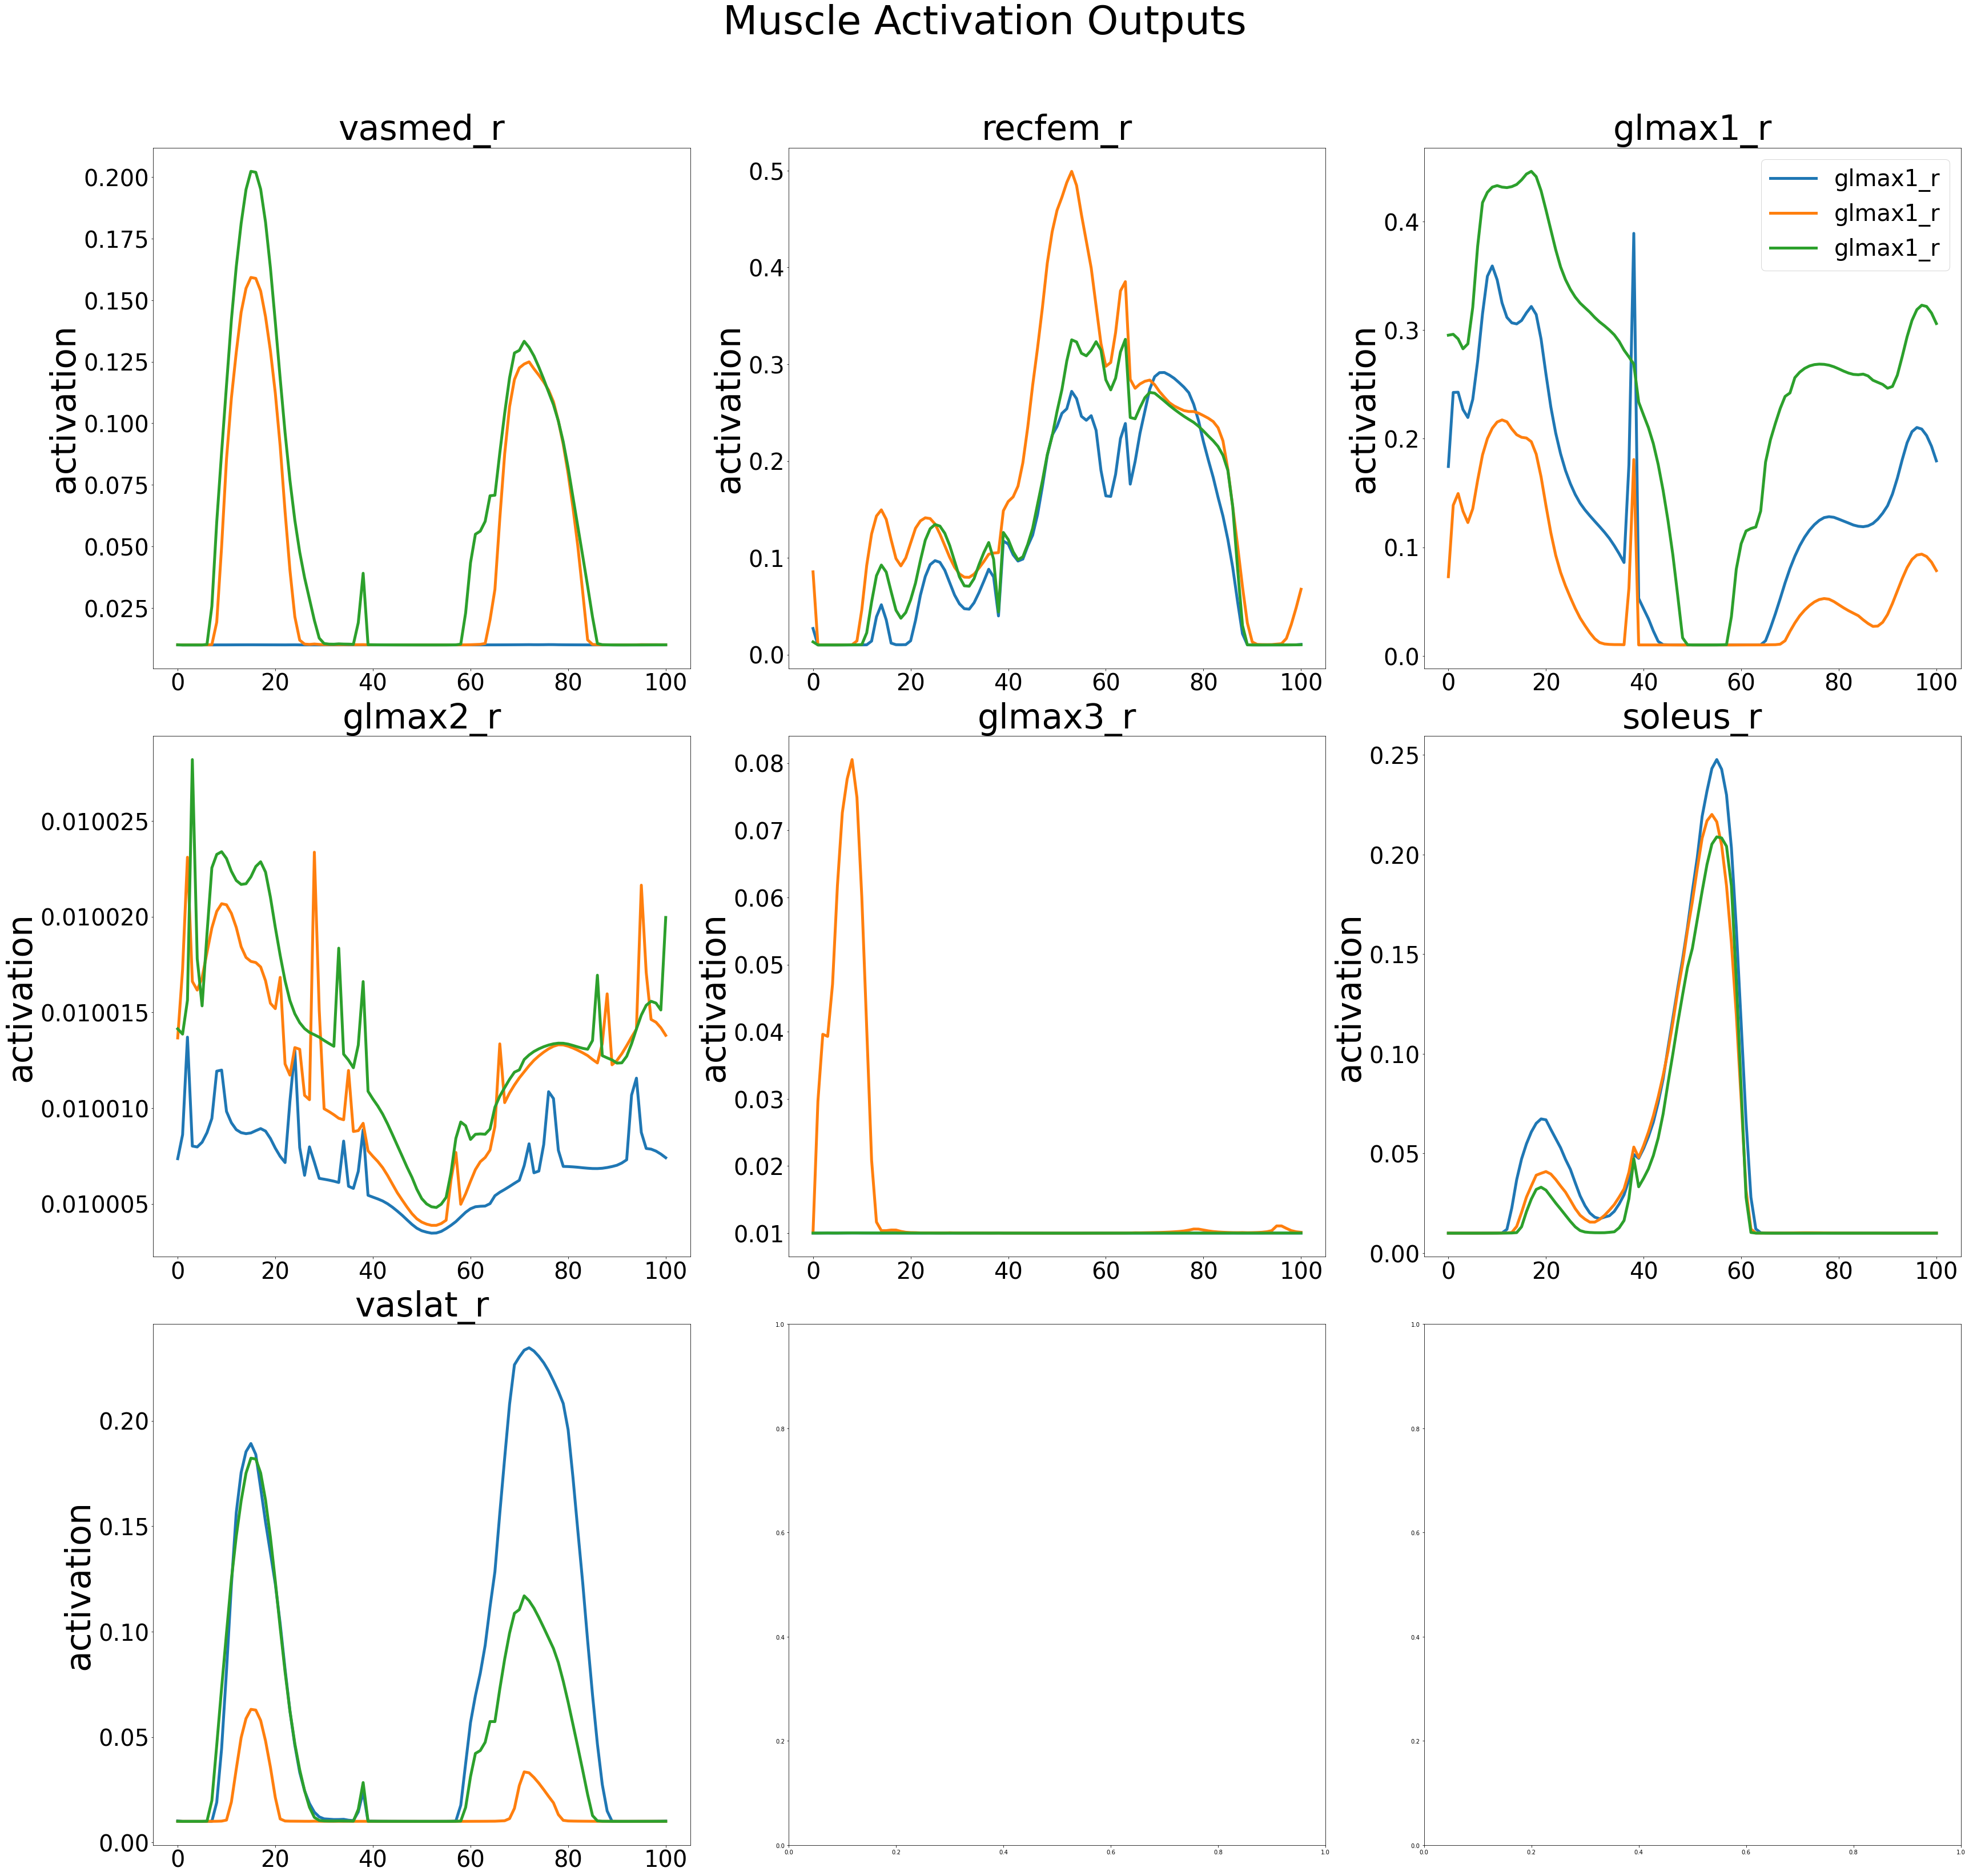

In [9]:
muscles = [
    'vasmed_r','recfem_r','glmax1_r','glmax2_r','glmax3_r','soleus_r','vaslat_r'
]

muscle_outcomes = [
    'activation',
#     'actuation',
#     'active_fiber_force',
#     'passive_fiber_force',
#     'tendon_strain',
#     'normalized_fiber_length',
#     'length'
]

rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(16*cols, (rows+1)*12))

fig.suptitle('Muscle Activation Outputs', fontsize=fontsize*3.5)

muscle_outcome = muscle_outcomes[0]
# ACTUATION
for muscle_idx, muscle in enumerate(muscles):
    row_ = muscle_idx // cols
    col_ = muscle_idx % cols
#     for idx, muscle in enumerate(muscles):
    jam.plot_muscle_output(
        muscle, 
        muscle_outcome, 
        ax=ax[row_, col_], 
        linewidth=5, 
        fontsize=fontsize*3,
        label=muscle
    )
    ax[row_, col_].set_ylabel(muscle_outcome, fontsize=fontsize*3)
    ax[row_, col_].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[row_, col_].yaxis.set_tick_params(labelsize=fontsize*2)
    ax[row_, col_].set_title(muscle, fontsize=fontsize*3)
    if muscle_idx == 2:
        ax[row_, col_].legend(fontsize=fontsize*2)
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot Contact Forces

In [10]:
get_h5_output(test_files[0],
              f'/{model}/forceset/Smith2018ArticularContactForce/tf_contact/tibia_cartilage/regional_contact_force'
             )

['0', '1', '2', '3', '4', '5']

In [11]:
jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 'total_center_of_pressure', 'total_contact_area', 'total_contact_force', 'total_contact_moment', 'total_max_pressure', 'total_mean_pressure'])

## NOTE!
- Region indexs in python are 1 different vs. in matlab!
- The matlab script tried to grab region(s) 5/6 which don't exist in the python version. 
- The above print statment shows that the keys available in the python class/dict are: 
    - All of the totals (e.g., total_center_of_pressure, total_contact_area...)
    - 0, 1, 2, 3, 4, 5 (no 6)
- It also shows that the original `.h5` file uses these same values (though strings vs ints).
- This is just due to the indexing approach used in matlab (1 based indexing) and python (0 based indexing)
- I did make a change to make the python version match the matlab one for "compatibility", but then realized:
    - This only matters for the actual tool used here and these results arent saved in this format, so it probably doesnt matter. 
    - The original .h5 actually uses the same indexing (0, 1, 2, 3, 4, 5) not the matlab one (+1 to each). So, this format better matches the .h5 file anyways => This is highlighted above.  
- **NB the regions just align differently - so med/lat tibia is 4/5 instead of 5/6 in matlab**

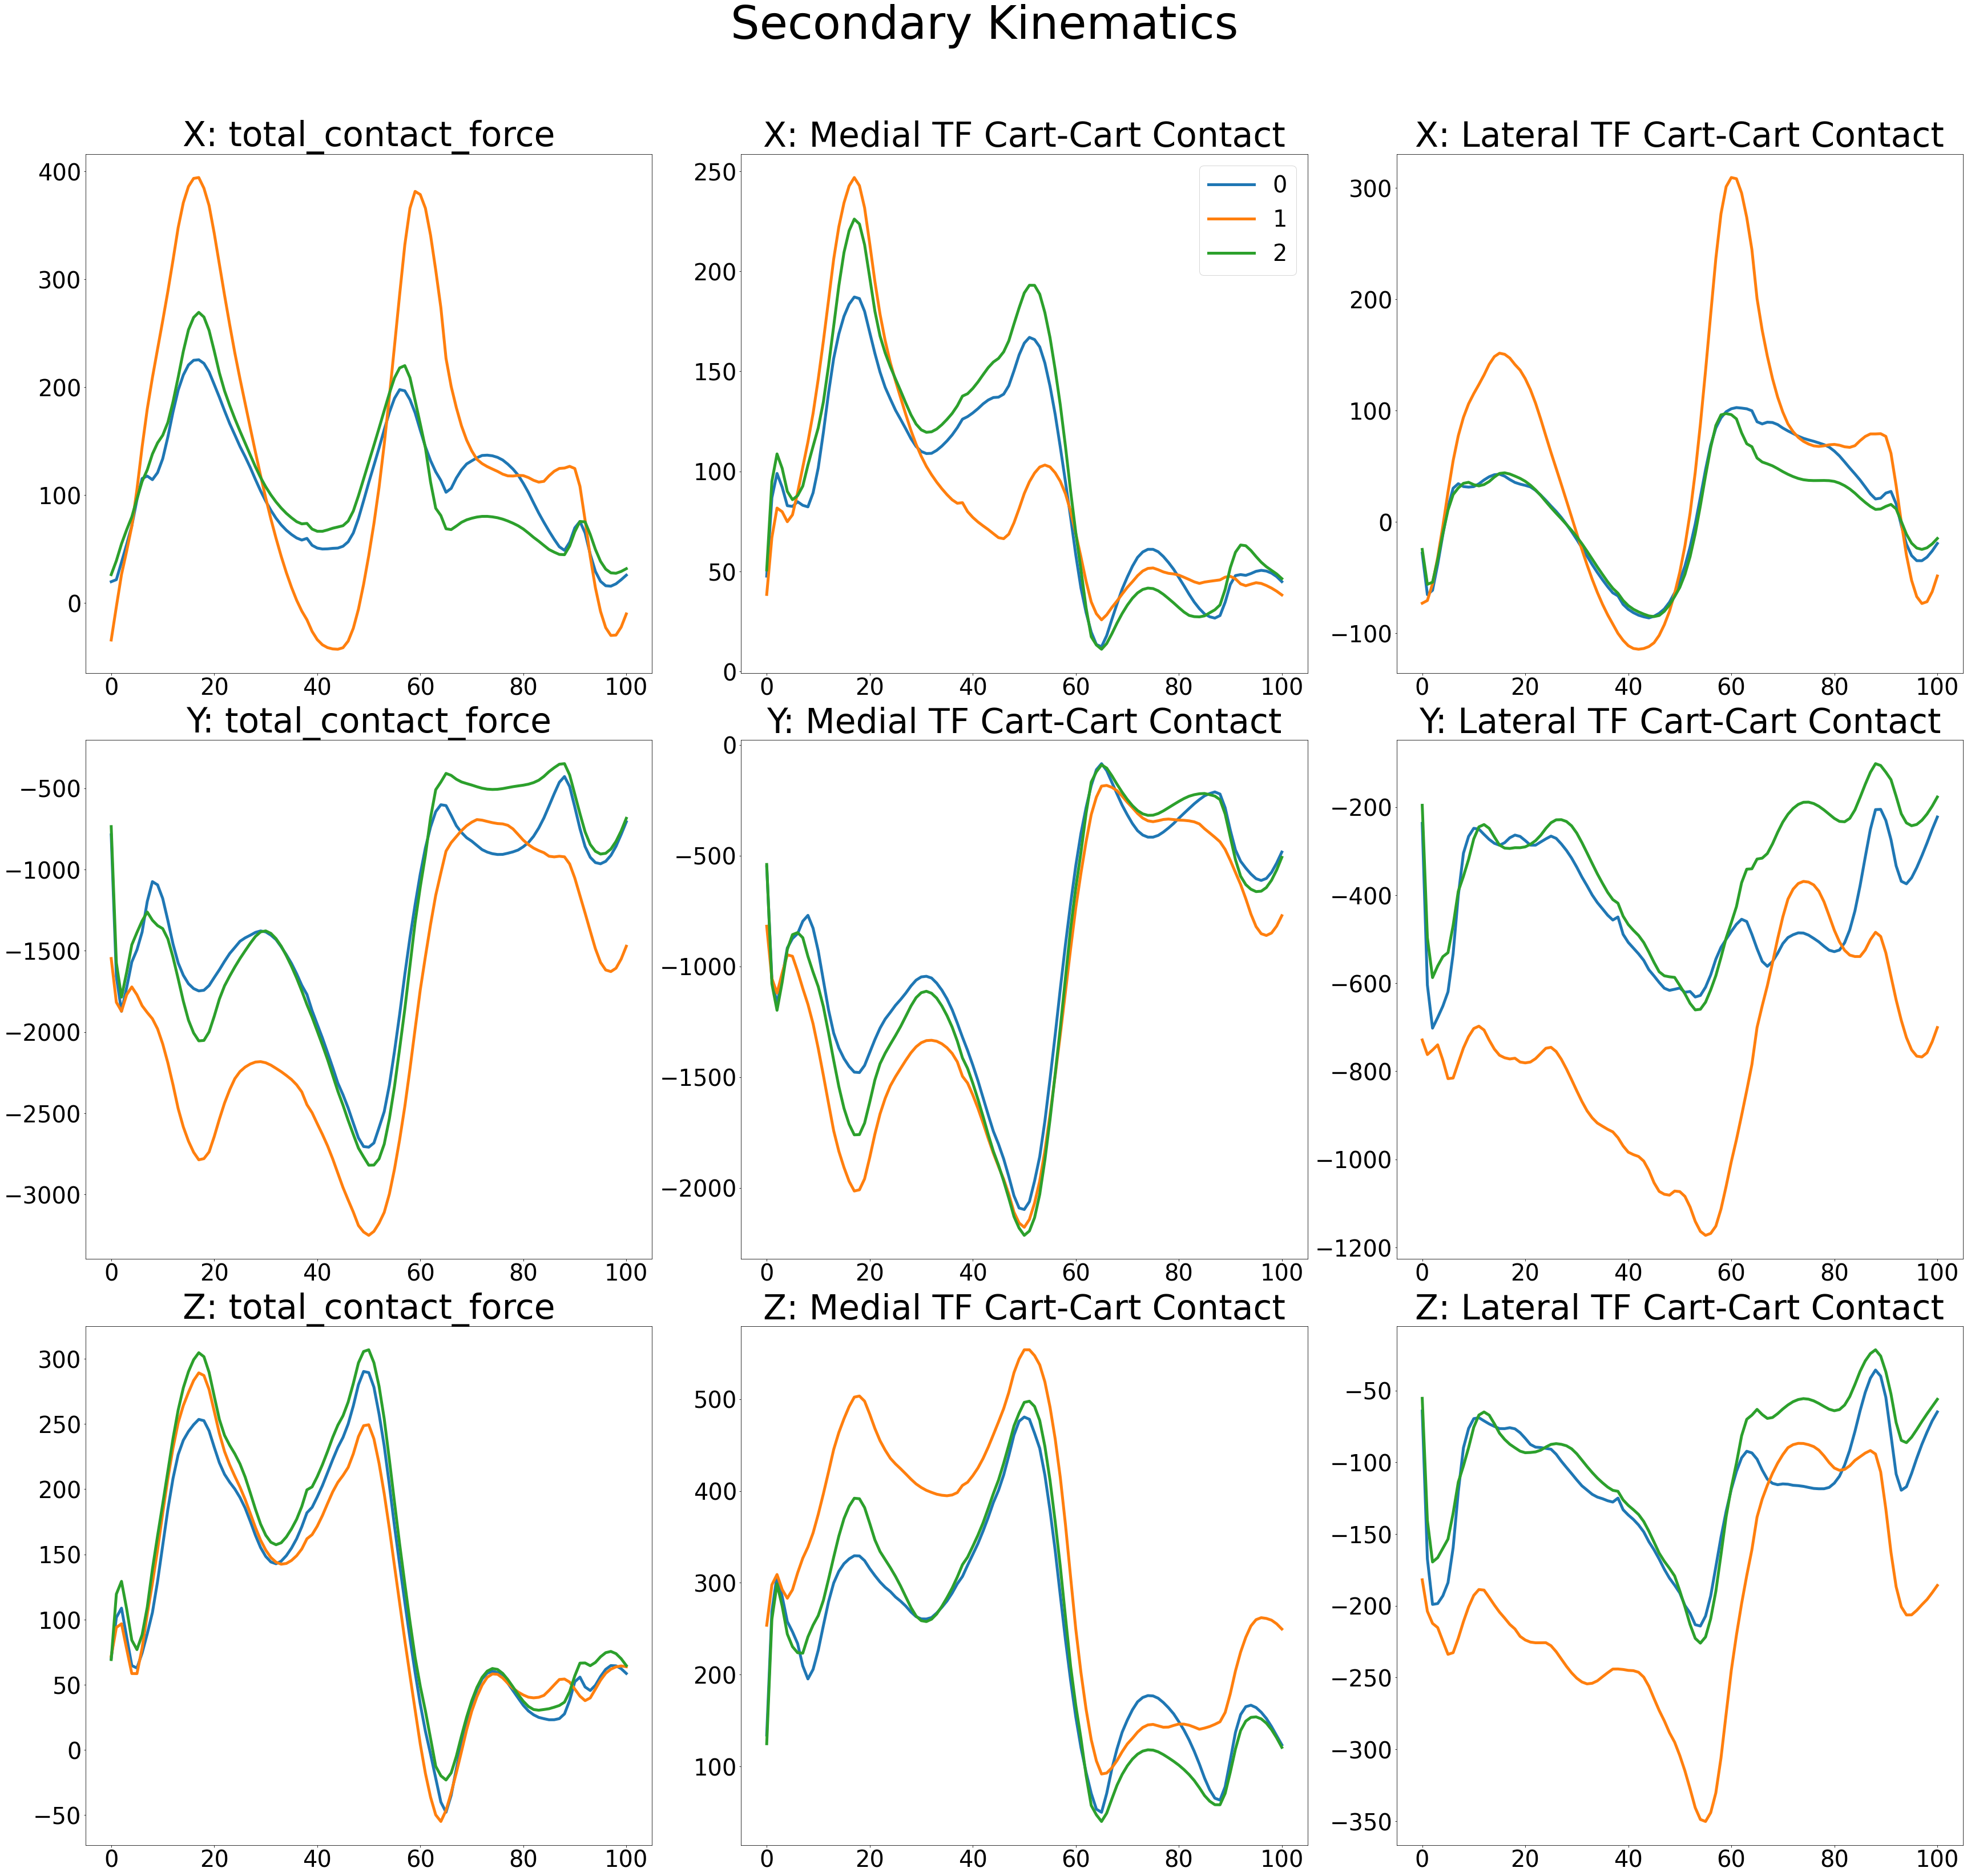

In [12]:
axes = ['X', 'Y', 'Z']
regions = [
    'total_contact_force', 
    {4: 'regional_contact_force'},
    {5: 'regional_contact_force'}
]

cartilage_regions = {
    4: 'Medial TF Cart-Cart Contact',
    5: 'Lateral TF Cart-Cart Contact'
}

rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(16*3, 4*12))

idx = 0
for axis_idx, axis in enumerate(axes):
    for region_idx, region in enumerate(regions):
        row_ = axis_idx
        col_ = region_idx
        for file_idx in range(len(test_files)):
            if type(region) is str:
                ax[row_, col_].plot(
                    jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][region][:, axis_idx, file_idx], 
                    linewidth=linewidth, 
                    label=file_idx
                )
            elif type(region) is dict:
                for reg_idx, reg_outcome in region.items():
                    ax[row_, col_].plot(
                        jam.forceset['Smith2018ArticularContactForce']['tf_contact']['tibia_cartilage'][reg_idx][reg_outcome][:, axis_idx, file_idx], 
                        linewidth=linewidth, 
                        label=file_idx
                    )
        ax[row_, col_].set_title(f"{axis}: {region if type(region) is str else cartilage_regions[next(iter(region))] }", fontsize=fontsize*3)
        ax[row_, col_].xaxis.set_tick_params(labelsize=fontsize*2)
        ax[row_, col_].yaxis.set_tick_params(labelsize=fontsize*2)
        if idx == 1:
            ax[row_, col_].legend(fontsize=fontsize*2)
        idx += 1

fig.suptitle('Secondary Kinematics', fontsize=fontsize*4)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


# Plot COMAK convergence

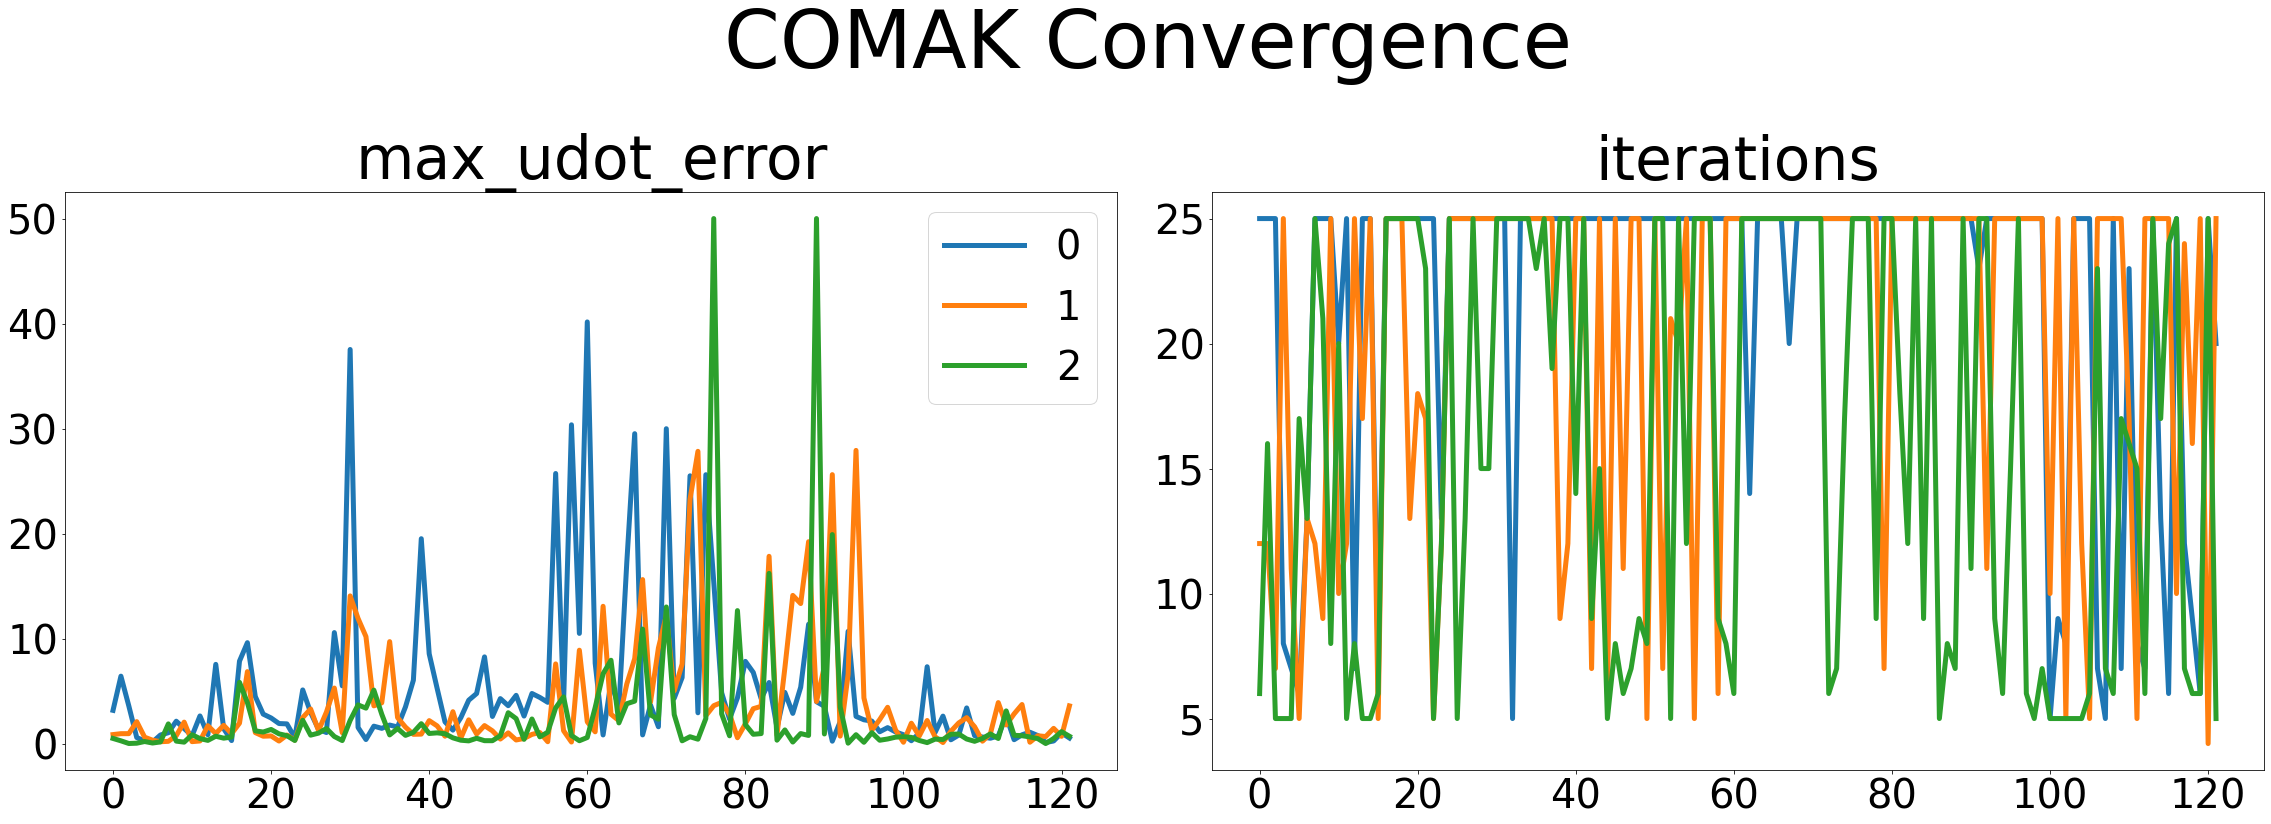

In [13]:
# Ligament Forces
comak_outcomes = ['max_udot_error', 'iterations']

rows = 1
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(16*cols, (rows)*12))
fig.suptitle('COMAK Convergence', fontsize=fontsize*4)

for idx, outcome in enumerate(comak_outcomes):    
    for file_idx in range(len(test_files)):
        data = jam.comak[outcome][:, file_idx]
        ax[idx].plot(data, linewidth=5, label=file_idx)
    ax[idx].set_title(outcome, fontsize=fontsize*3)
    ax[idx].xaxis.set_tick_params(labelsize=fontsize*2)
    ax[idx].yaxis.set_tick_params(labelsize=fontsize*2)
    if idx == 0:
        ax[idx].legend(fontsize=fontsize*2)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
! jupyter nbconvert --to html test_jam_analysis.ipynb

[NbConvertApp] Converting notebook test_jam_analysis.ipynb to html
[NbConvertApp] Writing 5449715 bytes to test_jam_analysis.html
